In [28]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from scipy.special import erfcinv as erfcinv
plt.rcParams['animation.html'] = 'html5'

# 2D Advection Equation

In [13]:
nx = 51
ny = 51
Lx = 1.0
Ly = 1.0
x = np.linspace(0, Lx, nx)
y = np.linspace(0, Ly, ny)
# dxy=100
# x = np.mgrid[-2500:2500+dxy:dxy]
# y = x
dx = Lx/(nx-1)
dy = Ly/(ny-1)
xx, yy = np.meshgrid(x, y)

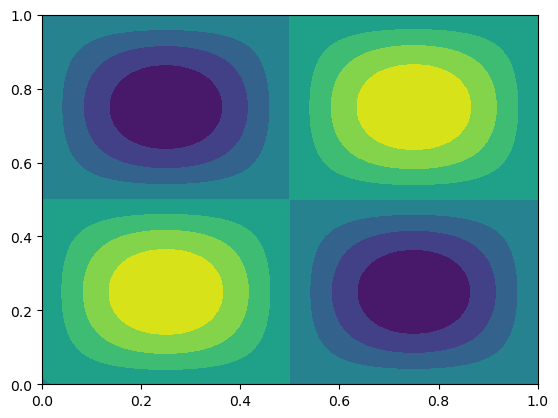

In [14]:
ω0 = 2.0*np.pi
# ω0 = -np.pi
u0 = lambda x, y: np.sin(ω0*x) * np.sin(ω0*y)
# u0 = lambda x, y: 1/np.sqrt(2*np.pi) * np.exp(-1/2 * (x-0.5)**2) * 1/np.sqrt(2*np.pi) * np.exp(-1/2 * (y-0.5)**2)
# plotting the initial conditions
plt.contourf(xx, yy, u0(xx, yy))

In [15]:
cx = 1.0
cy = 1.0

dt = 0.001
tend = 2.0
t = 0

cflx = cx * dt/dx
cfly = cy * dt/dy

# setup initial condition
sol = []
u = np.zeros([nx+2, ny+2])
u[1:-1, 1:-1] = u0(xx, yy)
# set periodic boundaries

u[:,0] = u[:,-3] #x-minus face
u[:,-1] = u[:,2] #x-plus face
u[0,:] = u[-3,:] #y-minus face
u[-1,:] = u[2,:] #y-plus face
sol.append(u)

In [16]:
while t < tend:
    un = sol[-1]
    unew = un.copy()
    unew[1:-1, 1:-1] = un[1:-1, 1:-1] - cflx * (un[1:-1, 1:-1] - un[1:-1, :-2]) - cfly * (un[1:-1, 1:-1] - un[:-2,1:-1])
    unew[:,0] = unew[:,-3] #x-minus face
    unew[:,-1] = unew[:,2] #x-plus face
    unew[0,:] = unew[-3,:] #y-minus face
    unew[-1,:] = unew[2,:] #y-plus face
    unew[-1] = unew[2]
    unew[0] = unew[-3]
    sol.append(unew)
    t += dt

In [17]:
new_sol = []
for solution in sol:
    new_sol.append(solution[1:-1, 1:-1])

In [22]:
new_sol[-1].shape

AttributeError: 'list' object has no attribute 'shape'

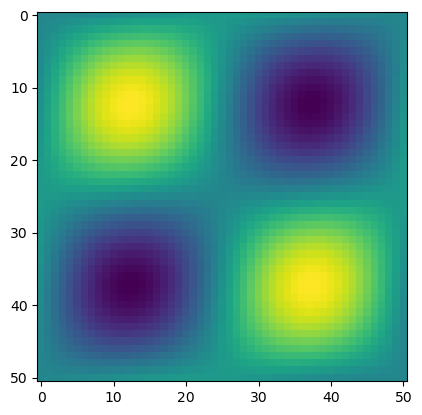

In [26]:
plt.imshow(new_sol[-1])

# Trying to make the solution look like what we have in Gaussian Plume Practical

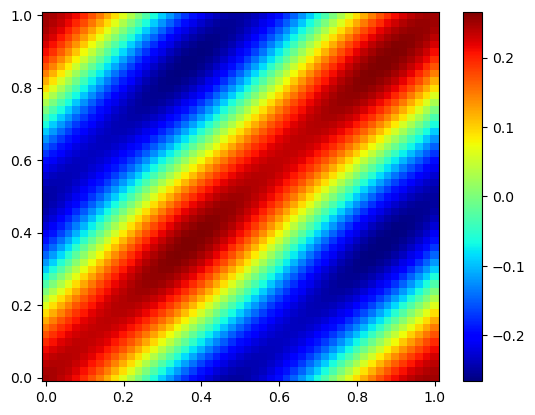

In [9]:
plt.pcolor(x, y, np.mean(new_sol, axis=0), cmap='jet')
plt.colorbar()

## No Diffusion

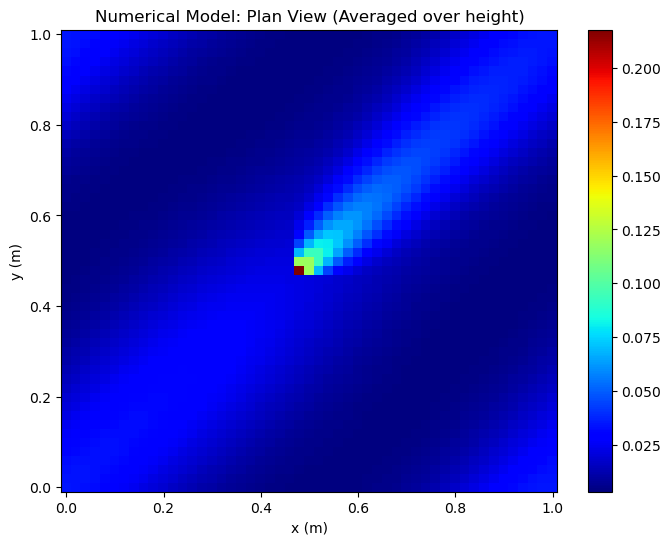

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# --- GRID SETUP ---
nx, ny, nz = 51, 51, 51  # Grid size (x, y, height)
Lx, Ly, Lz = 1.0, 1.0, 0.5  # Domain size (m)
dx, dy, dz = Lx/(nx-1), Ly/(ny-1), Lz/(nz-1)  # Grid spacing

x = np.linspace(0, Lx, nx)
y = np.linspace(0, Ly, ny)
z = np.linspace(0, Lz, nz)
xx, yy, zz = np.meshgrid(x, y, z, indexing='ij')

# --- PHYSICAL PARAMETERS ---
cx, cy, cz = 1.0, 1.0, 0.5  # Advection velocities (m/s)
dt = 0.001  # Time step (s)
tend = 2  # Total simulation time (s)
t = 0

cfl_x, cfl_y, cfl_z = cx * dt/dx, cy * dt/dy, cz * dt/dz

# --- INITIAL CONDITION (Gaussian Plume) ---
def gaussian_source(x, y, z):
    return np.exp(-100 * ((x - 0.5)**2 + (y - 0.5)**2 + (z - 0.25)**2))

u = np.zeros((nx+2, ny+2, nz+2))
# u[1:-1, 1:-1, 1:-1] = gaussian_source(xx, yy, zz)
# u[1:-1, 1:-1, 1:-1] = np.ones((nx, ny, nz))

sol = [u.copy()]

source_x, source_y, source_z = nx//2, ny//2, nz//5
Q = 1e-3

# --- TIME INTEGRATION ---
while t < tend:
    un = sol[-1]
    unew = un.copy()

    # Advection (Upwind Scheme)
    unew[1:-1, 1:-1, 1:-1] -= cfl_x * (un[1:-1, 1:-1, 1:-1] - un[:-2, 1:-1, 1:-1])
    unew[1:-1, 1:-1, 1:-1] -= cfl_y * (un[1:-1, 1:-1, 1:-1] - un[1:-1, :-2, 1:-1])
    unew[1:-1, 1:-1, 1:-1] -= cfl_z * (un[1:-1, 1:-1, 1:-1] - un[1:-1, 1:-1, :-2])

    unew[source_x, source_y, source_z] += Q * dt

    # Apply periodic boundary conditions
    unew[:, 0, :] = unew[:, -3, :]  # x-minus face
    unew[:, -1, :] = unew[:, 2, :]  # x-plus face
    unew[0, :, :] = unew[-3, :, :]  # y-minus face
    unew[-1, :, :] = unew[2, :, :]  # y-plus face
    unew[:, :, 0] = unew[:, :, -3]  # z-bottom face
    unew[:, :, -1] = unew[:, :, 2]  # z-top face

    sol.append(unew.copy())
    t += dt

# --- VISUALIZATION (Plume at Mid-Height) ---
# plt.figure(figsize=(8, 6))
# plt.imshow(sol[-1][:, :, nz//2].T, origin="lower", cmap="inferno", extent=[0, Lx, 0, Ly])
# plt.colorbar(label="Concentration")
# plt.xlabel("x (m)")
# plt.ylabel("y (m)")
# plt.title("Plume Dispersion at Mid-Height")
# plt.show()

numerical_C = sol[-1][1:-1, 1:-1, 1:-1]
plan_view_numerical = np.mean(numerical_C, axis=2)
# plan_view_numerical
X, Y = np.meshgrid(x, y)
plt.figure(figsize=(8,6))
plt.pcolor(X, Y, plan_view_numerical * 1e6, cmap='jet', shading='auto')
plt.colorbar()
plt.xlabel("x (m)")
plt.ylabel("y (m)")
plt.title("Numerical Model: Plan View (Averaged over height)")
plt.show()

## With Diffusion

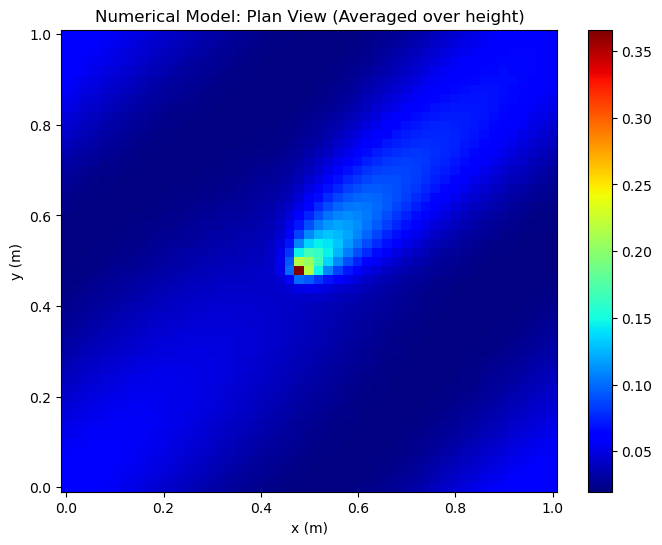

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# --- GRID SETUP ---
nx, ny, nz = 51, 51, 21  # Grid size (x, y, height)
Lx, Ly, Lz = 1.0, 1.0, 0.5  # Domain size (m)
dx, dy, dz = Lx/(nx-1), Ly/(ny-1), Lz/(nz-1)  # Grid spacing

x = np.linspace(0, Lx, nx)
y = np.linspace(0, Ly, ny)
z = np.linspace(0, Lz, nz)
xx, yy, zz = np.meshgrid(x, y, z, indexing='ij')

# --- PHYSICAL PARAMETERS ---
cx, cy, cz = 1.0, 1.0, 0.5  # Advection velocities (m/s)
sx, sy, sz = 0.01, 0.01, 0.005  # Diffusion coefficients (m^2/s)
dt = 0.001  # Time step (s)
tend = 2.0  # Total simulation time (s)
t = 0

cfl_x, cfl_y, cfl_z = cx * dt/dx, cy * dt/dy, cz * dt/dz
diff_x, diff_y, diff_z = sx * dt/dx**2, sy * dt/dy**2, sz * dt/dz**2

# --- INITIAL CONDITION (Gaussian Plume) ---
def gaussian_source(x, y, z):
    return np.exp(-100 * ((x - 0.5)**2 + (y - 0.5)**2 + (z - 0.25)**2))

u = np.zeros((nx+2, ny+2, nz+2))
# u[1:-1, 1:-1, 1:-1] = gaussian_source(xx, yy, zz)
# u[1:-1, 1:-1, 1:-1] = np.ones((nx, ny, nz))

sol = [u.copy()]

source_x, source_y, source_z = nx//2, ny//2, nz//5
Q = 1e-3

# --- TIME INTEGRATION ---
while t < tend:
    un = sol[-1]
    unew = un.copy()

    # Advection (Upwind Scheme)
    unew[1:-1, 1:-1, 1:-1] -= cfl_x * (un[1:-1, 1:-1, 1:-1] - un[:-2, 1:-1, 1:-1])
    unew[1:-1, 1:-1, 1:-1] -= cfl_y * (un[1:-1, 1:-1, 1:-1] - un[1:-1, :-2, 1:-1])
    unew[1:-1, 1:-1, 1:-1] -= cfl_z * (un[1:-1, 1:-1, 1:-1] - un[1:-1, 1:-1, :-2])

    # Diffusion (Central Differencing)
    unew[1:-1, 1:-1, 1:-1] += diff_x * (un[2:, 1:-1, 1:-1] - 2*un[1:-1, 1:-1, 1:-1] + un[:-2, 1:-1, 1:-1])
    unew[1:-1, 1:-1, 1:-1] += diff_y * (un[1:-1, 2:, 1:-1] - 2*un[1:-1, 1:-1, 1:-1] + un[1:-1, :-2, 1:-1])
    unew[1:-1, 1:-1, 1:-1] += diff_z * (un[1:-1, 1:-1, 2:] - 2*un[1:-1, 1:-1, 1:-1] + un[1:-1, 1:-1, :-2])

    unew[source_x, source_y, source_z] += Q * dt

    # Apply periodic boundary conditions
    unew[:, 0, :] = unew[:, -3, :]  # x-minus face
    unew[:, -1, :] = unew[:, 2, :]  # x-plus face
    unew[0, :, :] = unew[-3, :, :]  # y-minus face
    unew[-1, :, :] = unew[2, :, :]  # y-plus face
    unew[:, :, 0] = unew[:, :, -3]  # z-bottom face
    unew[:, :, -1] = unew[:, :, 2]  # z-top face

    sol.append(unew.copy())
    t += dt

# --- VISUALIZATION (Plume at Mid-Height) ---
# plt.figure(figsize=(8, 6))
# plt.imshow(sol[-1][:, :, nz//5].T, origin="lower", cmap="inferno", extent=[0, Lx, 0, Ly])
# plt.colorbar(label="Concentration")
# plt.xlabel("x (m)")
# plt.ylabel("y (m)")
# plt.title("Plume Dispersion at Mid-Height")
# plt.show()

numerical_C = sol[-1][1:-1, 1:-1, 1:-1]
plan_view_numerical = np.mean(numerical_C, axis=2)
# plan_view_numerical
X, Y = np.meshgrid(x, y)
plt.figure(figsize=(8,6))
plt.pcolor(X, Y, plan_view_numerical * 1e6, cmap='jet', shading='auto')
plt.colorbar()
plt.xlabel("x (m)")
plt.ylabel("y (m)")
plt.title("Numerical Model: Plan View (Averaged over height)")
plt.show()

# Trying to Match Gaussian Plume Practical

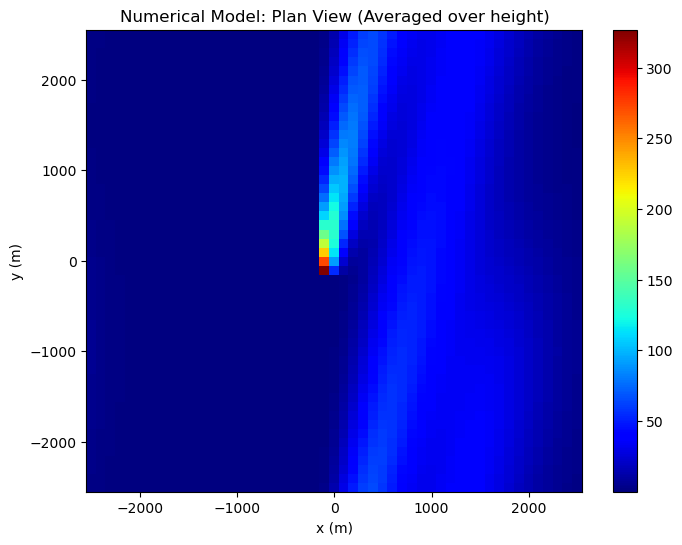

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# --- GRID SETUP ---
nx, ny, nz = 51, 51, 51  # Grid points
Lx, Ly, Lz = 5000, 5000, 500  # Domain size in meters
dx, dy, dz = Lx / (nx-1), Ly / (ny-1), Lz / (nz-1)  # Grid spacing

x = np.linspace(-2500, 2500, nx)  # Centered at (0,0)
y = np.linspace(-2500, 2500, ny)
z = np.linspace(0, Lz, nz)
xx, yy, zz = np.meshgrid(x, y, z, indexing='ij')

# --- PHYSICAL PARAMETERS ---
cx, cy, cz = 5.0, 1.0, 0.5  # Wind speeds (m/s)
# sx, sy, sz = 1.0, 1.0, 0.5  # Small diffusion coefficients (m²/s)
dt = 0.5  # Time step (s)
tend = 2000  # Total simulation time (s)
t = 0

cfl_x, cfl_y, cfl_z = cx * dt/dx, cy * dt/dy, cz * dt/dz
# diff_x, diff_y, diff_z = sx * dt/dx**2, sy * dt/dy**2, sz * dt/dz**2

# --- INITIAL CONDITION (Gaussian Plume) ---
def gaussian_source(x, y, z):
    return np.exp(-100 * ((x - 0.5)**2 + (y - 0.5)**2 + (z - 0.25)**2))

u = np.zeros((nx+2, ny+2, nz+2))
# u[1:-1, 1:-1, 1:-1] = gaussian_source(xx, yy, zz)

source_x, source_y, source_z = nx//2, ny//2, nz//5
Q = 1e-3

sol = [u.copy()]

# --- TIME INTEGRATION ---
while t < tend:
    un = sol[-1]
    unew = un.copy()

    # Advection (Upwind Scheme)
    unew[1:-1, 1:-1, 1:-1] -= cfl_x * (un[1:-1, 1:-1, 1:-1] - un[:-2, 1:-1, 1:-1])
    unew[1:-1, 1:-1, 1:-1] -= cfl_y * (un[1:-1, 1:-1, 1:-1] - un[1:-1, :-2, 1:-1])
    unew[1:-1, 1:-1, 1:-1] -= cfl_z * (un[1:-1, 1:-1, 1:-1] - un[1:-1, 1:-1, :-2])

    # Diffusion (Central Differencing)
    # unew[1:-1, 1:-1, 1:-1] += diff_x * (un[2:, 1:-1, 1:-1] - 2*un[1:-1, 1:-1, 1:-1] + un[:-2, 1:-1, 1:-1])
    # unew[1:-1, 1:-1, 1:-1] += diff_y * (un[1:-1, 2:, 1:-1] - 2*un[1:-1, 1:-1, 1:-1] + un[1:-1, :-2, 1:-1])
    # unew[1:-1, 1:-1, 1:-1] += diff_z * (un[1:-1, 1:-1, 2:] - 2*un[1:-1, 1:-1, 1:-1] + un[1:-1, 1:-1, :-2])

    unew[source_x, source_y, source_z] += Q * dt
    
    # Apply periodic boundary conditions
    unew[:, 0, :] = unew[:, -3, :]  # x-minus face
    unew[:, -1, :] = unew[:, 2, :]  # x-plus face
    unew[0, :, :] = unew[-3, :, :]  # y-minus face
    unew[-1, :, :] = unew[2, :, :]  # y-plus face
    unew[:, :, 0] = unew[:, :, -3]  # z-bottom face
    unew[:, :, -1] = unew[:, :, 2]  # z-top face

    sol.append(unew.copy())
    t += dt

# --- VISUALIZATION (Plume at Mid-Height) ---
# plt.figure(figsize=(8, 6))
# plt.imshow(sol[-1][:, :, nz//5].T, origin="lower", cmap="inferno", extent=[-2500, 2500, -2500, 2500])
# plt.colorbar(label="Concentration")
# plt.xlabel("x (m)")
# plt.ylabel("y (m)")
# plt.title("Plume Dispersion at 50m Height")
# plt.show()

numerical_C = sol[-1][1:-1, 1:-1, 1:-1]
plan_view_numerical = np.mean(numerical_C, axis=2)
X, Y = np.meshgrid(x, y)
plt.figure(figsize=(8,6))
plt.pcolor(X, Y, plan_view_numerical * 1e6, cmap='jet', shading='auto')
plt.colorbar()
plt.xlabel("x (m)")
plt.ylabel("y (m)")
plt.title("Numerical Model: Plan View (Averaged over height)")
plt.show()